________________________________________________________________________________________________________________________


* Yuvraj Sutar 
* yuvrajsutar009@gmail.com
_ _________________________________________________________________________________________________________________________
_  _________________________________________________________________________________________________________________________


In [1]:
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic') 
titanic.head()
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score


In [31]:
titanic.info() # information dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [32]:
titanic.describe() 

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
titanic.isnull().sum() # show the null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
titanic.drop(['age','alive'], axis=1, inplace=True)

In [35]:
titanic 


,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
887,1,1,female,0,0,30.0000,S,First,woman,False,B,Southampton,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False
889,1,1,male,0,0,30.0000,C,First,man,True,C,Cherbourg,True


In [36]:
l=['sex','embarked','class','who','adult_male','deck','embark_town','alone'] # transform data set
for i in l:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    le.fit(titanic[i])
    titanic[i]=le.transform(titanic[i])

In [37]:
X = titanic.iloc[:,1:]
y = titanic.iloc[:,0]

In [38]:
X

,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,3,1,1,0,7.2500,2,2,1,1,7,2,0
1,1,0,1,0,71.2833,0,0,2,0,2,0,0
2,3,0,0,0,7.9250,2,2,2,0,7,2,1
3,1,0,1,0,53.1000,2,0,2,0,2,2,0
4,3,1,0,0,8.0500,2,2,1,1,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,13.0000,2,1,1,1,7,2,1
887,1,0,0,0,30.0000,2,0,2,0,1,2,1
888,3,0,1,2,23.4500,2,2,2,0,7,2,0
889,1,1,0,0,30.0000,0,0,1,1,2,0,1


In [39]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=11)
X_train

,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
333,3,1,2,0,18.0000,2,2,1,1,7,2,0
662,1,1,0,0,25.5875,2,0,1,1,4,2,1
382,3,1,0,0,7.9250,2,2,1,1,7,2,1
331,1,1,0,0,28.5000,2,0,1,1,2,2,1
149,2,1,0,0,13.0000,2,1,1,1,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,0,0,0,135.6333,2,0,2,0,2,2,1
337,1,0,0,0,134.5000,0,0,2,0,4,0,1
91,3,1,0,0,7.8542,2,2,1,1,7,2,1
80,3,1,0,0,9.0000,2,2,1,1,7,2,1


In [41]:
# Create Decision Tree classifer object
DT=DecisionTreeClassifier(criterion="entropy",)

# Train Decision Tree Classifer
DT.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = DT.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [42]:
DT

DecisionTreeClassifier(criterion='entropy')

In [43]:
y_pred = DT.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=DT.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred)) 


Train data accuracy: 0.9382022471910112
Test data accuracy: 0.8156424581005587


[Text(159.88875829646017, 212.004, 'X[8] <= 0.5\nentropy = 0.968\nsamples = 712\nvalue = [431, 281]'),
 Text(76.84845132743362, 201.132, 'X[0] <= 2.5\nentropy = 0.865\nsamples = 289\nvalue = [83, 206]'),
 Text(36.29469026548673, 190.26, 'X[5] <= 1.5\nentropy = 0.302\nsamples = 149\nvalue = [8, 141]'),
 Text(33.33185840707964, 179.388, 'entropy = 0.0\nsamples = 44\nvalue = [0, 44]'),
 Text(39.25752212389381, 179.388, 'X[4] <= 26.125\nentropy = 0.389\nsamples = 105\nvalue = [8, 97]'),
 Text(25.184070796460176, 168.516, 'X[7] <= 1.0\nentropy = 0.544\nsamples = 48\nvalue = [6, 42]'),
 Text(22.221238938053098, 157.644, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(28.146902654867258, 157.644, 'X[2] <= 0.5\nentropy = 0.601\nsamples = 41\nvalue = [6, 35]'),
 Text(14.814159292035399, 146.772, 'X[4] <= 13.25\nentropy = 0.469\nsamples = 30\nvalue = [3, 27]'),
 Text(11.851327433628319, 135.9, 'X[9] <= 4.5\nentropy = 0.629\nsamples = 19\nvalue = [3, 16]'),
 Text(5.925663716814159, 125.02799

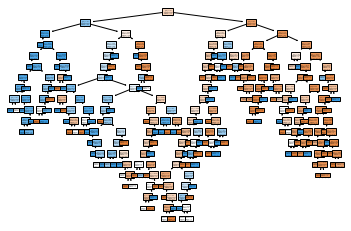

In [45]:
plot_tree(DT, filled=True)

* Yuvraj Sutar 
* yuvrajsutar009@gmail.com